<a href="https://colab.research.google.com/github/Avinshghodse/Airbnb-Bookings-Analysis---Capstone-Project.ipynb/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

Let's take some required libraries

In [ ]:
from wordcloud.color_from_image import ImageColorGenerator
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

import statistics
from collections import Counter
#NLP
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
# word cloud
from wordcloud import WordCloud, ImageColorGenerator
sns.set_theme(style="ticks",color_codes=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/Airbnb NYC 2019 (1).csv'

df = pd.read_csv(file_path)

In [ ]:
#Let's check using shape() how many rows and columns available in given dataset
df.shape

(48895, 16)

Observations:
* There are 16 columns
* Observations are 48895.

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
# let's get information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


Observations:

1- Minimum of price var. is 0.00       Maximum is 10000.00

2- Mean price is $ 152.

3- On an average people stays 7 days in a room.

In [ ]:
# let's check how much NuN values are there in datasets
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

Observations:

1- Four coulmns with null values.

2- Name columns have 16 null values.

3- host_name have 21 null columns.

4- last_review and reviews_per_month have 10052 null values respectively.

5- we will go through with all columns and decide what we can do with them.

## Missing value handling:

In [ ]:
#missing value in percentage.
total = df.isnull().sum().sort_values(ascending = False)#total per column
missing_values= round(((df.isnull().sum())*100)/df.isnull().count().sort_values(ascending = False),2)
#missing_value data frame.
missing_total_per = pd.concat([total,missing_values],axis = 1,keys = ['total','Percentage'],sort = False).sort_values('total',ascending=False)
missing_total_per

,total,Percentage
last_review,10052,20.56
reviews_per_month,10052,20.56
host_name,21,0.04
name,16,0.03
id,0,0.00
host_id,0,0.00
neighbourhood_group,0,0.00
neighbourhood,0,0.00
latitude,0,0.00
longitude,0,0.00


As per data analysis point of view host_name will not be that impportant as its an catogorical feature and will have lots of catogories and this will not contribute in exploring the data and also from security point of view of host.

column 'last_review' & 'reviews_per_month' are have lots of mission values with 20% of all dataset we are going to replace with 0 for NA values in 'reviews_per_month' column.

also we'll convert its data type to catogorical feature and replace 'NA' with 'Never'.

### reviews_per_month 'NA' value handling:

In [ ]:
# we can impute it with '0' as these listing didn't get any reviews yet
df.reviews_per_month.fillna(value = 0, inplace = True)

### last_review 'NA' value handling.

In [ ]:
df['last_review']

0        2018-10-19
1        2019-05-21
2               NaN
3        2019-07-05
4        2018-11-19
            ...    
48890           NaN
48891           NaN
48892           NaN
48893           NaN
48894           NaN
Name: last_review, Length: 48895, dtype: object

In [ ]:
# to deal with NA in 'last_review', we change the column to catogorical variable (by year),
# and those that have NA will be categorized as 'Never', as they did not get any reviews yet to
# convert the data field
df['last_review'].fillna(value = 0, inplace = True)
'''
#df['last_review'] = pd.datetime(df['last_review'], format = '%Y-%m-%d')
#df.last_review = df['last_review'].dt.year.astype('object')
#df.last_review.fillna(value = Never, inplace = True)
'''

"\n#df['last_review'] = pd.datetime(df['last_review'], format = '%Y-%m-%d')\n#df.last_review = df['last_review'].dt.year.astype('object')\n#df.last_review.fillna(value = Never, inplace = True)\n"

In [ ]:
df['last_review']

0        2018-10-19
1        2019-05-21
2                 0
3        2019-07-05
4        2018-11-19
            ...    
48890             0
48891             0
48892             0
48893             0
48894             0
Name: last_review, Length: 48895, dtype: object

# Univariate Analysis:


1) column_no_1:name

In [ ]:
# name column
df.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

In [ ]:
df[df['name'].isnull()].head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,0,0.00,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,2015-06-08,0.45,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,2015-01-01,0.02,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,2016-01-02,0.09,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,0,0.00,1,0


Observations:

1. This columns is having names describing the property which is host is trying to give on rent, so the nature of this names is short and consie and this is required as this can draw an attention of customer.
2. The question arises that how to fill the missing values in this columns. we will explore further dataset and try to find out better options to fill the missing values.
3. This feature can be important in model building like recommender systems.
4. Of course there is no point in removing these cells although they are limited in numbers.

In [ ]:
df.room_type

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

Observations:

1. room_type column is not having any null values, and we can try to use this values in place of NaN values in name coumns this can solve our purpose and we can atleast put front what is the type of room!
2. Yes, we will replace the NuN values with the values which are in room_type column.

In [ ]:
#This code snippet will replace the NuN values.
#fillna()method will do the job...
df.name.fillna(df.room_type, inplace = True)

In [ ]:
# Check the changes.
df.isnull().sum()

id                                 0
name                               0
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

Observations:

1. We have replaced the NuN values with corresponding room_type values.
2. This should solve our purpose.

In [ ]:
# Stop words removal :
"""
1) download the nltk stopwords in english.
2) replace panctuation and special symbols.
3) make it string and conveert all into lower case.
then split the words and compair each with the stopwords and keep only those which are not in stopword list.stopwords
"""
def stop_word_removal(dtf):
  stop = stopwords.words('english')
  df.name = df.name.str.replace("[^\w\s]","").str.lower()
  df.name = df.name.apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))


In [ ]:
#text = stop_word_removal(df)
text = " ".join(str(each) for each in df.name)

<Figure size 720x432 with 0 Axes>

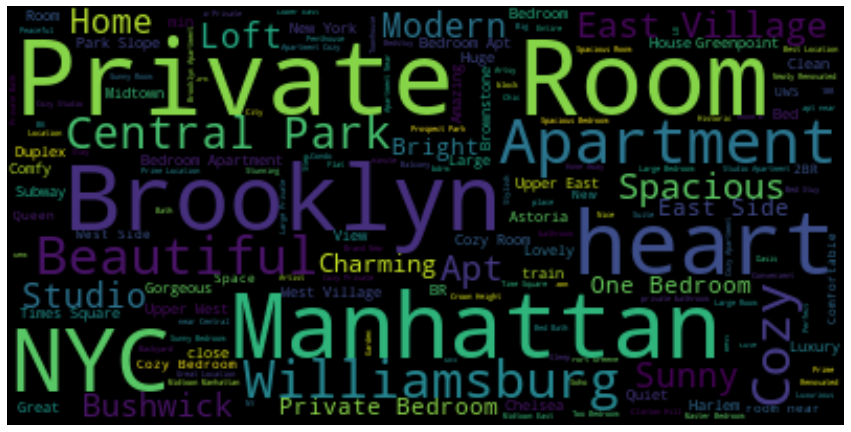

In [ ]:
#wordcloud generator.
# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=300, background_color="black").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show();
pass

Observations:

1. This word cloud shows us the most frequent words.

In [ ]:
# after removing stop words.
df.name

0                       Clean & quiet apt home by the park
1                                    Skylit Midtown Castle
2                      THE VILLAGE OF HARLEM....NEW YORK !
3                          Cozy Entire Floor of Brownstone
4         Entire Apt: Spacious Studio/Loft by central park
                               ...                        
48890      Charming one bedroom - newly renovated rowhouse
48891        Affordable room in Bushwick/East Williamsburg
48892              Sunny Studio at Historical Neighborhood
48893                 43rd St. Time Square-cozy single bed
48894    Trendy duplex in the very heart of Hell's Kitchen
Name: name, Length: 48895, dtype: object

## Top 50 words from word_cloud:

In [ ]:
#list of words.
name_list = list(df.name.values)
words = []
for i in name_list:
  words+=i.split()

In [ ]:
#Let's see top 50 used words
# https:www.kite.com/python/docs/collections.Counter.most_common
_top_50_words=Counter(words).most_common()
_top_50_words=_top_50_words[0:50]

In [ ]:
#dataFrame for top 50 words.
top_50_words = pd.DataFrame(_top_50_words,columns = ['words','frequency'])

[Text(0, 0, 'in'),
 Text(0, 0, 'Private'),
 Text(0, 0, 'Room'),
 Text(0, 0, 'room'),
 Text(0, 0, 'Bedroom'),
 Text(0, 0, 'Cozy'),
 Text(0, 0, 'Apartment'),
 Text(0, 0, 'to'),
 Text(0, 0, 'Brooklyn'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, 'the'),
 Text(0, 0, 'bedroom'),
 Text(0, 0, 'of'),
 Text(0, 0, 'with'),
 Text(0, 0, '&'),
 Text(0, 0, 'Spacious'),
 Text(0, 0, 'and'),
 Text(0, 0, 'Studio'),
 Text(0, 0, 'East'),
 Text(0, 0, 'Manhattan'),
 Text(0, 0, 'Park'),
 Text(0, 0, 'apartment'),
 Text(0, 0, '-'),
 Text(0, 0, 'Williamsburg'),
 Text(0, 0, 'Apt'),
 Text(0, 0, 'Sunny'),
 Text(0, 0, 'Beautiful'),
 Text(0, 0, 'Village'),
 Text(0, 0, 'NYC'),
 Text(0, 0, 'private'),
 Text(0, 0, 'Central'),
 Text(0, 0, 'Large'),
 Text(0, 0, 'near'),
 Text(0, 0, 'from'),
 Text(0, 0, 'West'),
 Text(0, 0, 'Modern'),
 Text(0, 0, 'Loft'),
 Text(0, 0, '1BR'),
 Text(0, 0, 'a'),
 Text(0, 0, 'Luxury'),
 Text(0, 0, 'apt'),
 Text(0, 0, 'Upper'),
 Text(0, 0, 'for'),
 Text(0, 0, 'Charming'),
 Text(0, 0, 'w/'

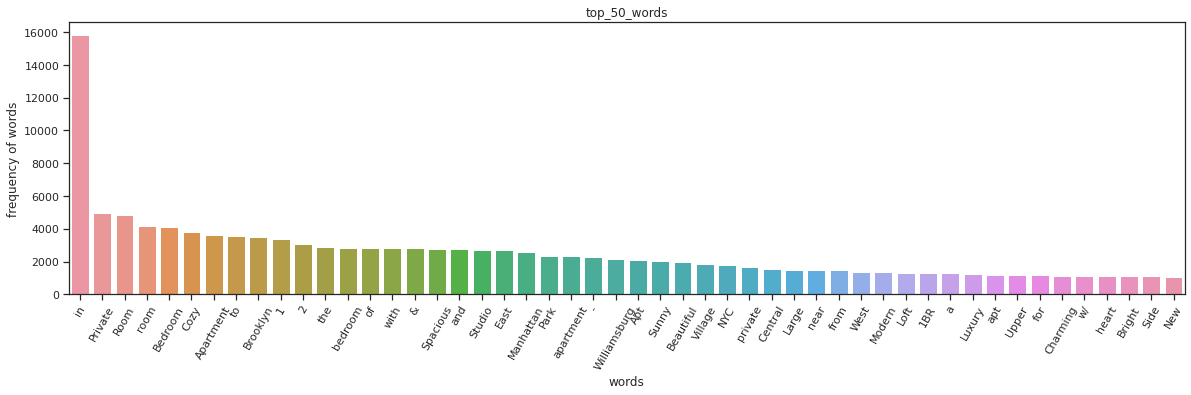

In [ ]:
# visualization
plt.figure(figsize=(20,5))
ax_1 = sns.barplot(x='words',y='frequency',data = top_50_words)
ax_1.set_title('top_50_words')
ax_1.set_ylabel('frequency of words')
ax_1.set_xlabel('words')
ax_1.set_xticklabels(ax_1.get_xticklabels(),rotation=60)

Observations:

1. The above observation shows us the top 50 words and there frequency.
2. These words can he help full in model building point of view.

## 2) column_no_2 host_name:

In [ ]:
df['host_name'].nunique()

11452

Observations:

1. host_name this column is defening the name of host(owner).
2. There are 11452 unique hosts/owners we can use this feature directly in model building just by encoding it.response encoding will be usefull for this feature.
3. we can take NuN value as one data pint for model building.

## 3) column_no_3 neighbourhood_group:

In [ ]:
df['neighbourhood_group']

0         Brooklyn
1        Manhattan
2        Manhattan
3         Brooklyn
4        Manhattan
           ...    
48890     Brooklyn
48891     Brooklyn
48892    Manhattan
48893    Manhattan
48894    Manhattan
Name: neighbourhood_group, Length: 48895, dtype: object

In [ ]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

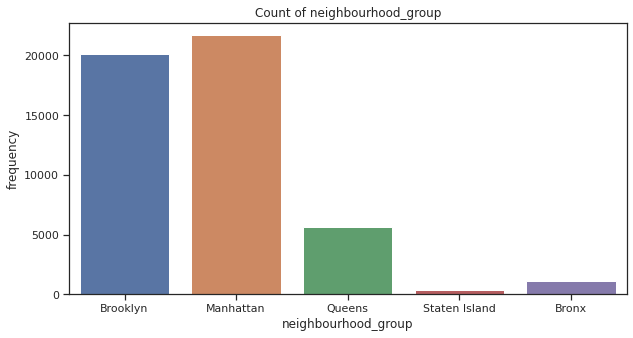

In [ ]:
# count_plot
plt.figure(figsize=(10,5))
ax_3= sns.countplot(x='neighbourhood_group', data=df)
ax_3.set_title('Count of neighbourhood_group')
ax_3.set_ylabel('frequency')
ax_3.set_xlabel('neighbourhood_group')
plt.show()

Observations:

1. Brooklyn and Mnahattan have the highest hotel/room bookings.

2. Staten island has lowest hotel bookings

## 4) column_no_4 neighbourhood:

In [ ]:
neighbour_unique_val = df['neighbourhood'].value_counts()
neighbour_unique_val

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

Observations:

1.There are 221 unique neighbor.

### Top 50 most common neighbours

In [ ]:
# most_common() Return a list of the n most common elements and their counts from the most common to the least.
top_50_ = Counter(df['neighbourhood']).most_common()
top_50_ = top_50_[0:50]
top_50_[:20]


[('Williamsburg', 3920),
 ('Bedford-Stuyvesant', 3714),
 ('Harlem', 2658),
 ('Bushwick', 2465),
 ('Upper West Side', 1971),
 ("Hell's Kitchen", 1958),
 ('East Village', 1853),
 ('Upper East Side', 1798),
 ('Crown Heights', 1564),
 ('Midtown', 1545),
 ('East Harlem', 1117),
 ('Greenpoint', 1115),
 ('Chelsea', 1113),
 ('Lower East Side', 911),
 ('Astoria', 900),
 ('Washington Heights', 899),
 ('West Village', 768),
 ('Financial District', 744),
 ('Flatbush', 621),
 ('Clinton Hill', 572)]

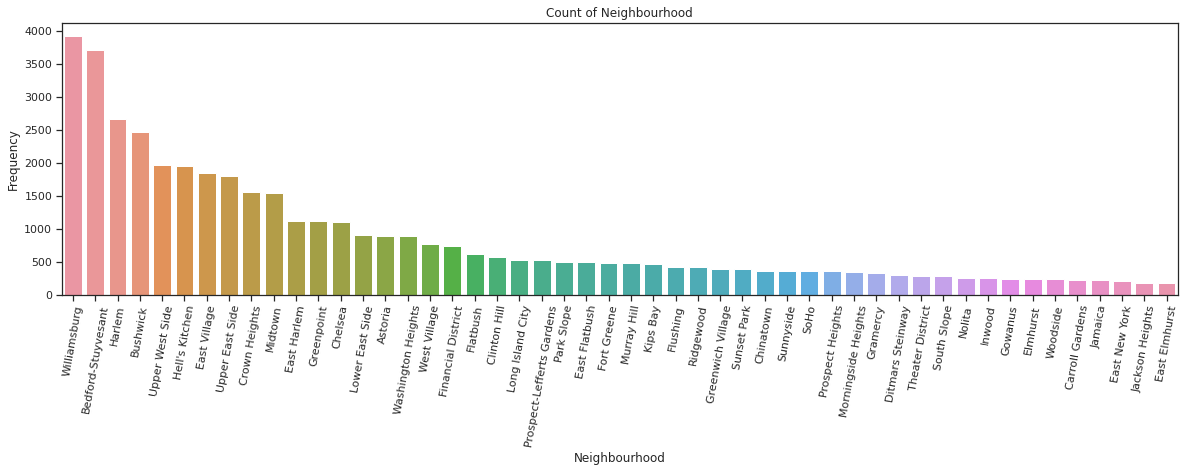

In [ ]:
#count_plot
plt.figure(figsize=(20,5))
ax_4 = sns.barplot(x='neighbourhood',y='count',data = pd.DataFrame(top_50_,columns=['neighbourhood','count'][:20]))
ax_4.set_title('Count of Neighbourhood')
ax_4.set_ylabel('Frequency')
ax_4.set_xlabel('Neighbourhood')
ax_4.set_xticklabels(ax_4.get_xticklabels(), rotation=80);
plt.show()


Observations:

1. The above graph shows us some of the top Neighbours towns we can say.

2. People love to stay at these towns more offent.

## 5) column_no_5 latitude & longitude:

In [ ]:
df[['latitude', 'longitude']]

,latitude,longitude
0,40.64749,-73.97237
1,40.75362,-73.98377
2,40.80902,-73.94190
3,40.68514,-73.95976
4,40.79851,-73.94399
...,...,...
48890,40.67853,-73.94995
48891,40.70184,-73.93317
48892,40.81475,-73.94867
48893,40.75751,-73.99112


Observations:

1. We can see the exact locations from this columns.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


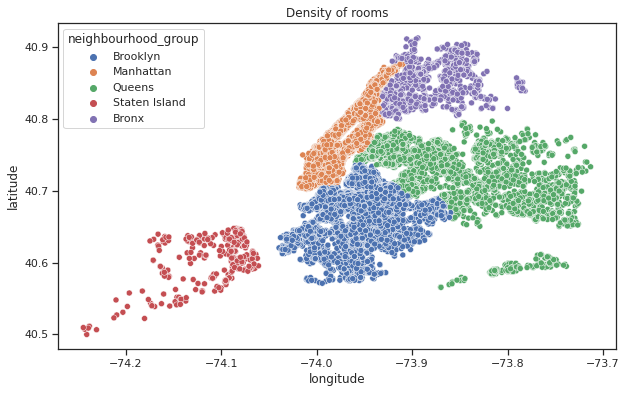

In [ ]:
# simple scatterplot:

# reference:https://www.geekforgeeks.org/scatterplot-using-seaborn-in-python/

plt.figure(figsize=(10,6))
ax_5 = sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
ax_5.set_title('Density of rooms')
ax_5.set_ylabel('latitude')
ax_5.set_xlabel('longitude')
plt.show()

Observations.

1.latitude and longitude visulizes us that brooklyn and Manhattan are the most dense with hotels and apartments followed by queens island.

## 6) Column_no_6 room_type:


In [ ]:
df[['room_type']].nunique()

room_type    3
dtype: int64

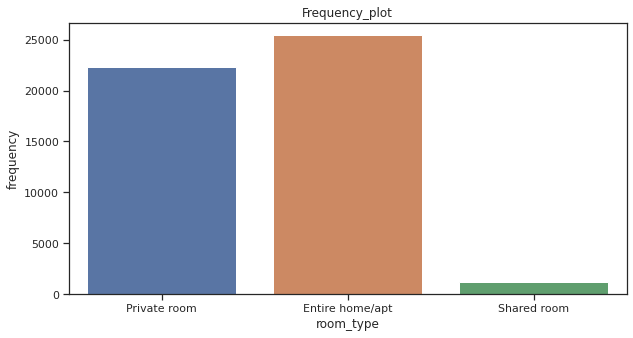

In [ ]:
#count_plot'
plt.figure(figsize=(10,5))
sns_6 = sns.countplot(x='room_type',data = df)
sns_6.set_title('Frequency_plot')
sns_6.set_ylabel('frequency')
sns_6.set_xlabel('room_type')

plt.show()

Observations:

1. There are three types of rooms
2. Namely:

   1.Private room

   2.Entire home/apt room_type

   3.Shared room.

3. People mostly prefered to take whole apartment on rent followed by private room.
4. very few people prefered to have shared rooms.

We'll try to catogorise the 'price' like cheep, affordable and expensive and then analyse the 'price' for 'room_type' as per it.

## 7) column_no_7 price:


In [ ]:
df[['price']].describe()

,price
count,48895.000000
mean,152.720687
std,240.154170
min,0.000000
25%,69.000000
50%,106.000000
75%,175.000000
max,10000.000000


In [ ]:
# function to catogory the types of rooms.
def price_catagory(price):
  if price <=80:
    return 'Cheep'
  elif price>=80 and price <=500:
    return 'Affordable'
  else:
    return 'Expensive'

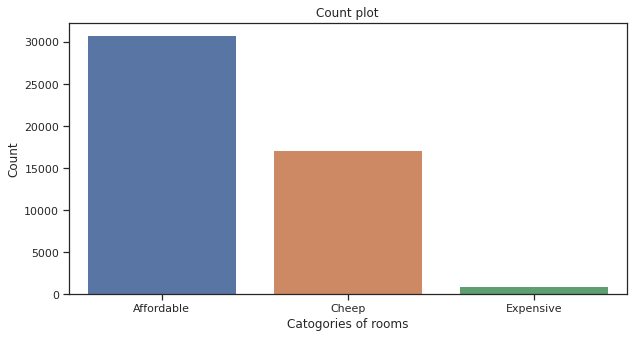

In [ ]:
plt.figure(figsize=(10,5))
ax_7 = sns.countplot(x=df['price'].apply(price_catagory))
ax_7.set_title('Count plot')
ax_7.set_xlabel('Catogories of rooms')
ax_7.set_ylabel('Count')
plt.show()

Observations:

1. We have considered to devide the whole price range into three catogories
  A. cheep(price range below or 
  equal to USD-80)

  B. Affordable( price range is 
  USD-80 and USD-500)

  C.Expensive( price range is more 
  than  USD-500) so, it look like 
  people have more intrest in 
  having affordable rooms/apartments
  rather than having a cheep and
  expensive rooms.

## 8) column_no_8 minimum_nights:

In [ ]:
df[['minimum_nights']].value_counts()

minimum_nights
1                 12720
2                 11696
3                  7999
30                 3760
4                  3303
                  ...  
182                   1
183                   1
184                   1
185                   1
1250                  1
Length: 109, dtype: int64

In [ ]:
df[['minimum_nights']].describe()

,minimum_nights
count,48895.000000
mean,7.029962
std,20.510550
min,1.000000
25%,1.000000
50%,3.000000
75%,5.000000
max,1250.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


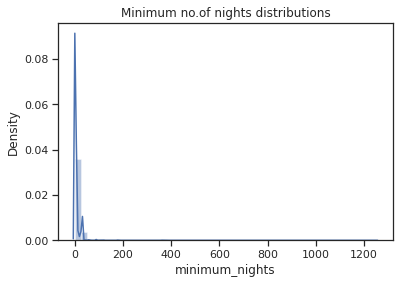

In [ ]:
ax = sns.distplot(df.minimum_nights)
plt.title('Minimum no.of nights distributions')
plt.show()

Observations:

1. Most of the nights booked are from 0 to less than 100 days.we'll see and plot further.

2. We can see that there may be outliers. We can plot and check it.

3. log scale can show us the shape of skwed data.

Note: How do you handle skewed data in python?

==> One way of handling right or left, skewed data is to carry out the logarithmic transformation on our data. For example, np.log(x)will log transform the variable x in python. There are other options as well as the Box-Cox and Square root trasnformations.

Observation from statistics:

1. Average booking is around 7 nights.

2. Minimum booking is for 1 nights.

3. Maximum booking is for more than a year or we can say for few years.

In [ ]:
#https://www.marsja.se/transform-skewed-data-using-square-root-log-box-cox-methods-in-python/# Log_Transformation
#https://seaborn.pydata.org/generated/seaborn.distplot.html
from scipy.stats import boxcox
# power transform
df_box_cox_transform = boxcox(df.minimum_nights)#Lambda=0 it means Log transform by defination of

In [ ]:
df_box_cox_transform

(array([0.        , 0.        , 0.86162699, ..., 1.41767289, 0.        ,
        1.28379566]), -0.46182559978389276)

Text(0.5, 1.0, 'Minimum no.of nights destribution')

<Figure size 720x360 with 0 Axes>

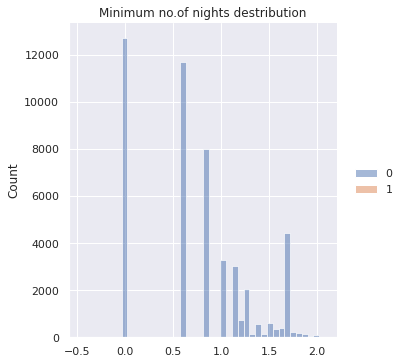

In [ ]:
# plot for box-cox transformed data.
sns.set_theme();np.random.seed(0)
plt.figure(figsize=(10,5))
ax = sns.displot(df_box_cox_transform)
plt.title('Minimum no.of nights destribution')

Observations:

1. it's very clear that the data is right skwed.

In [ ]:
log_transform = np.log(df['minimum_nights'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Minimum no.of nights distribution')

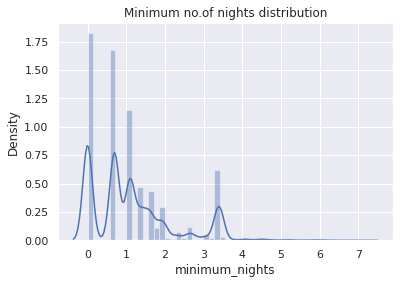

In [ ]:
ax = sns.distplot(log_transform)
plt.title('Minimum no.of nights distribution')

Observations:

1. This plot shows that majority of room booking is one for 1 to 4 days.

2. Box-Cox transformed plot strictly shows that the majority of booking lies between 0 to 3 days. We have set the lambda parameter not equal to zero so it by defination of box-cox transform selected the best value of lambda.

## 9) column_no_9 Number_of_reviews:

In [ ]:
df[['number_of_reviews']].value_counts()


number_of_reviews
0                    10052
1                     5244
2                     3465
3                     2520
4                     1994
                     ...  
352                      1
351                      1
341                      1
340                      1
629                      1
Length: 394, dtype: int64

In [ ]:
df[['number_of_reviews']].describe()

,number_of_reviews
count,48895.000000
mean,23.274466
std,44.550582
min,0.000000
25%,1.000000
50%,5.000000
75%,24.000000
max,629.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'number_of_reviews')

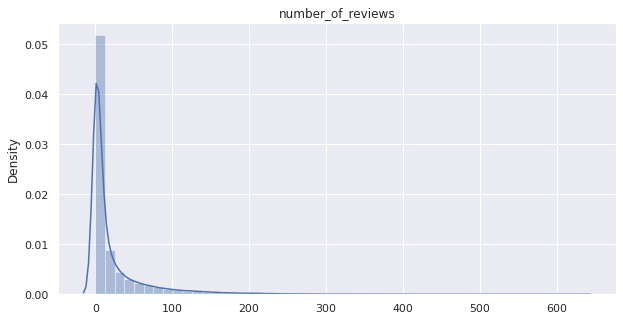

In [ ]:
plt.figure(figsize=(10,5))
ax = sns.distplot(x=df['number_of_reviews'])
plt.title('number_of_reviews')

Observations:

1. Number of reviews are highly dense from 0 to 100 reviews.

2. We can say that most of the rooms are not rated and those which are frequently occupied only those are rated.

3. Maximum 629 times the particular room is rated.

4. Average rating is around 23.

## 10) column_no_10 last_review:

In [ ]:
df[['last_review']]

,last_review
0,2018-10-19
1,2019-05-21
2,0
3,2019-07-05
4,2018-11-19
...,...
48890,0
48891,0
48892,0
48893,0


Observations:

1. This is the column which signifies the last time the room was given review.

2. Secondly, there are certain rooms which are not reviewd at all, it can happen that no one had visited till now or not bothered to give review to those rooms.

3. Also there are NuN values these values can either be filled with the help of domain expert or with suitable value like since no one has reviwed we will fill it up with 'zeros'.

## 9) column_no_9_reviews_per_month:

In [ ]:
df[['reviews_per_month']].describe()

,reviews_per_month
count,48895.000000
mean,1.090910
std,1.597283
min,0.000000
25%,0.040000
50%,0.370000
75%,1.580000
max,58.500000


Observations:

1. max 58 times rating is given.

2. min is 0 times.

3. 75% of data is for 1.5 times rating.

## 10) column_no_10 calculated_host_listings_count:

In [ ]:
Counter(df['calculated_host_listings_count']).most_common(50)
#Counter(df['neighbourhood']).most_common()

[(1, 32303),
 (2, 6658),
 (3, 2853),
 (4, 1440),
 (5, 845),
 (6, 570),
 (8, 416),
 (7, 399),
 (327, 327),
 (9, 234),
 (232, 232),
 (10, 210),
 (96, 192),
 (12, 180),
 (13, 130),
 (121, 121),
 (11, 110),
 (52, 104),
 (103, 103),
 (33, 99),
 (49, 98),
 (91, 91),
 (87, 87),
 (15, 75),
 (14, 70),
 (23, 69),
 (34, 68),
 (17, 68),
 (65, 65),
 (31, 62),
 (28, 56),
 (18, 54),
 (50, 50),
 (25, 50),
 (47, 47),
 (43, 43),
 (20, 40),
 (39, 39),
 (37, 37),
 (32, 32),
 (30, 30),
 (29, 29),
 (27, 27),
 (26, 26),
 (21, 21),
 (19, 19),
 (16, 16)]

In [ ]:
print('1. There is one host who is {} time listed. '.format(df.calculated_host_listings_count.max()))
print('1. There is the corresponding host_id {} who is having highest listing. '.format(df.host_id.value_counts().idxmax()))
print('1. There is the corresponding host_id {} who is having lowest listing. '.format(df.host_id.value_counts().idxmin()))

1. There is one host who is 327 time listed. 
1. There is the corresponding host_id 219517861 who is having highest listing. 
1. There is the corresponding host_id 28638583 who is having lowest listing. 


## 11) column_no_11 availability_365:

In [ ]:
df[['availability_365']].value_counts()

availability_365
0                   17533
365                  1295
364                   491
1                     408
89                    361
                    ...  
195                    26
196                    24
183                    24
181                    23
202                    20
Length: 366, dtype: int64

Text(0.5, 1.0, 'Scatterplot_availability_365')

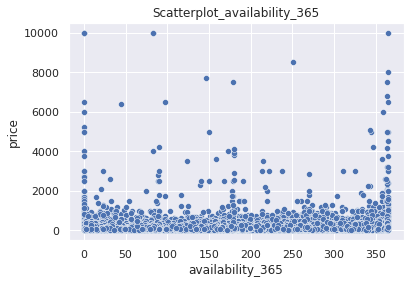

In [ ]:
ax = sns.scatterplot(data=df,x='availability_365',y='price')
plt.title("Scatterplot_availability_365")

Observations:

1. From above plot we can see thatb most of the available rooms are in the price range of 0 to 2000.

2. Very few are available for price above 2000$, this is quite obvious that there are very few peoples who prefer to have expensive rooms.

## Multivariate Analysis:


In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

## Let's find the relation between neighbourhood_group and price:


In [ ]:
price_df = pd.DataFrame(df['price'].apply(price_catagory))

In [ ]:
price_df.head()

,price
0,Affordable
1,Affordable
2,Affordable
3,Affordable
4,Cheep


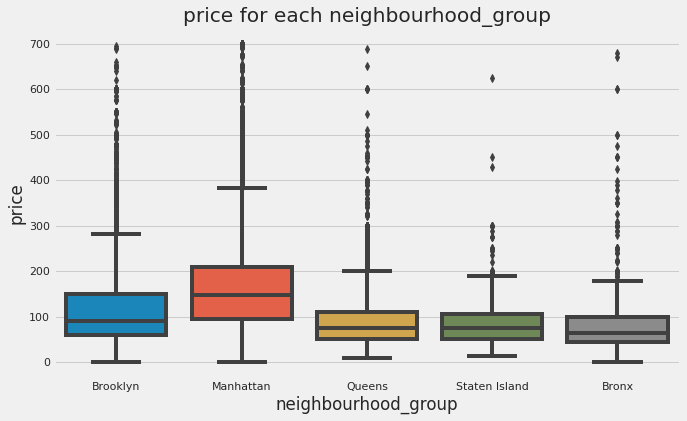

In [ ]:
plt.style.use('fivethirtyeight')

price_500 = df[df.price < 700]
plt.figure(figsize=(10,6))
plt.title("price for each neighbourhood_group")
sns.boxplot(y= 'price',x= 'neighbourhood_group',data=price_500)
plt.show()

Observations:

1. We can see that manhattam is the most expensive destination immediatly followed by brooklyn.

2. Queens, staten island and bronx, are having price range less as compaired to other two.

## Relationship between neighbourhood_group and median price.

In [ ]:
#grouping median price with neighbourhood_group.
neighbour_group_price_group = df.groupby(['neighbourhood_group']).agg({'price':'median'}).reset_index()
neighbour_group_price_group

,neighbourhood_group,price
0,Bronx,65.0
1,Brooklyn,90.0
2,Manhattan,150.0
3,Queens,75.0
4,Staten Island,75.0


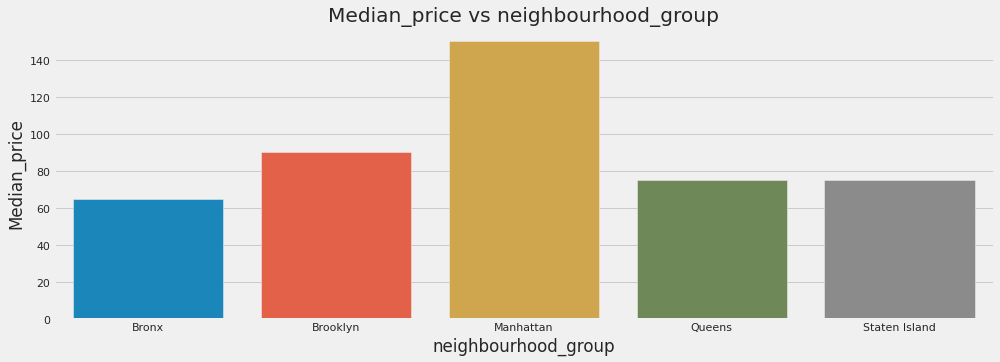

In [ ]:
#barplot for price varivation and neighbourhood.
plt.figure(figsize=(15,5))
ax_12 = sns.barplot(x='neighbourhood_group',y = 'price',data = neighbour_group_price_group)
ax_12.set_title('Median_price vs neighbourhood_group')
ax_12.set_xlabel('neighbourhood_group')
ax_12.set_ylabel('Median_price')
plt.show()

Observations:

1. 'Manhattan' is the area having highest median price, followed by Brooklyn

## Let's find the relation between neighbourhood and price:

* We'll make group of all neighbourhood who are having median of price variable.

* Median have less impact of outliers as compaired to mean.

In [ ]:
df[['neighbourhood']].nunique()

neighbourhood    221
dtype: int64

In [ ]:
# we will
neighbour_group_price_group = df.groupby(['neighbourhood']).agg({'price':'median'}).reset_index()

In [ ]:
neighbour_group_price_group

,neighbourhood,price
0,Allerton,66.5
1,Arden Heights,72.5
2,Arrochar,65.0
3,Arverne,125.0
4,Astoria,85.0
...,...,...
216,Windsor Terrace,123.0
217,Woodhaven,52.0
218,Woodlawn,68.0
219,Woodrow,700.0


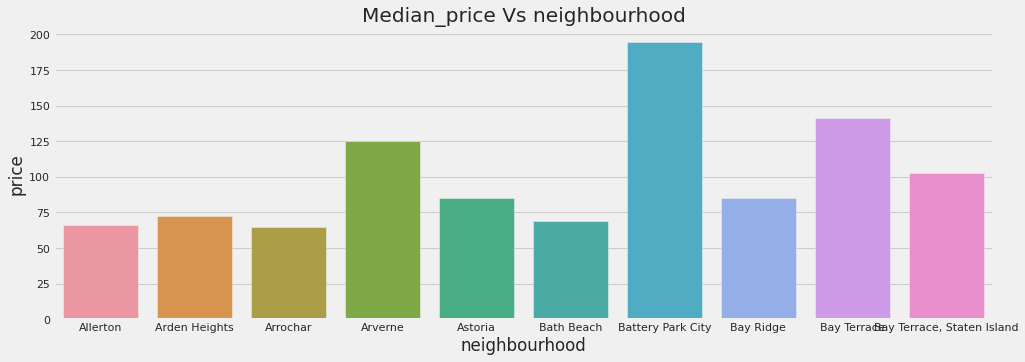

In [ ]:
#barplot for price variation and neighbourhood.
plt.figure(figsize=(15,5))
sns.barplot(x = 'neighbourhood',y = 'price',data = neighbour_group_price_group.head(10))
plt.title('Median_price Vs neighbourhood')
plt.show()

Observations:

1. The price variation considering median value tells us that 'Allerton','Asden Heights','Arrochar', and other are the top 10 neighbourhoods.

2. 'Battery Park City' is having high price in Top 10 neighbourhoods.

## Relationship between price and room_type

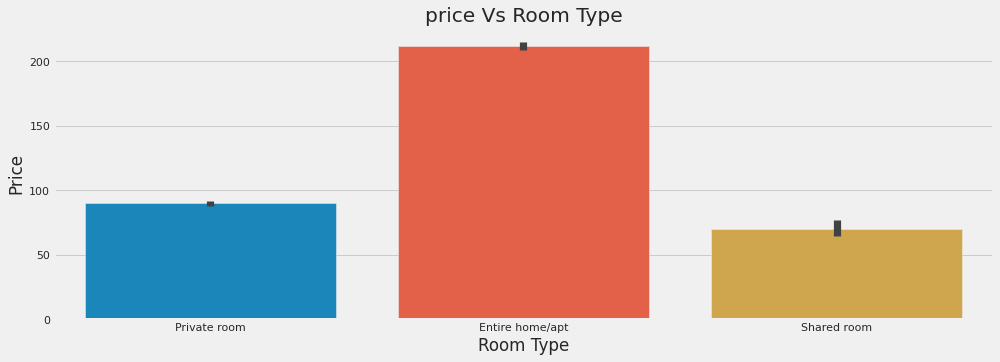

In [ ]:
plt.figure(figsize = (15,5))
ax_8 = sns.barplot(y= 'price', x= 'room_type', data=df)
ax_8.set_title('price Vs Room Type')
ax_8.set_xlabel('Room Type')
ax_8.set_ylabel('Price')
plt.show()

Observations:

1. We can see that most of the pricess for all type of room lies with 2000$.

2. Shared rooms pricess are having vary less price.

3. Very few rooms are there which are in expensive catogory.

4. Large number of rooms are available in either entire room/apartment or private rooms/apartment.

In [ ]:
df["number_of_reviews"].value_counts()

0      10052
1       5244
2       3465
3       2520
4       1994
       ...  
313        1
540        1
480        1
326        1
341        1
Name: number_of_reviews, Length: 394, dtype: int64

## Relationship between room_type and neighbourhood_group.

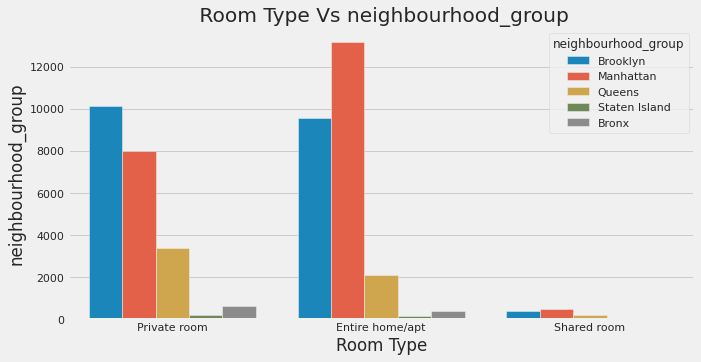

In [ ]:
plt.figure(figsize=(10,5))
ax_11 = sns.countplot(x='room_type',hue='neighbourhood_group',data=df)
ax_11.set_title(' Room Type Vs neighbourhood_group')
ax_11.set_xlabel('Room Type')
ax_11.set_ylabel('neighbourhood_group')
plt.show()

## Which neighbourhood are generating maximum,minimum,reveneus from room types.

In [ ]:
room_type_df = df.groupby(['neighbourhood','room_type']).agg({'price':'sum'})
room_type_df.sort_values("price",ascending=False)

,,price
neighbourhood,room_type,
Williamsburg,Entire home/apt,389724
Midtown,Entire home/apt,331395
Upper West Side,Entire home/apt,329129
Hell's Kitchen,Entire home/apt,301786
Upper East Side,Entire home/apt,284150
...,...,...
South Beach,Shared room,20
Morris Heights,Shared room,20
Schuylerville,Shared room,20


In [ ]:
room_type_df = pd.pivot_table(room_type_df, values='price', index=['neighbourhood'], columns=['room_type'])

In [ ]:
room_type_df.head()

room_type,Entire home/apt,Private room,Shared room
neighbourhood,,,
Allerton,1969.0,1710.0,NaN
Arden Heights,228.0,41.0,NaN
Arrochar,1897.0,518.0,NaN
Arverne,10782.0,2369.0,76.0
Astoria,54178.0,47512.0,3779.0


In [ ]:
print("**** Maximum revenue in Entire home/apt...******",'\n')
print(room_type_df.sort_values('Entire home/apt',ascending=False).head(1),'\n')

print("*************************************************",'\n')

print("******* minimun revenue in Entire home/apt...*********",'\n')
print(room_type_df.sort_values('Entire home/apt',ascending=True).head(1),'\n')

print("*************************************************",'\n')

print("******* Maximun revenue in Private room...*********",'\n')
print(room_type_df.sort_values('Private room',ascending=False).head(1),'\n')

print("*************************************************",'\n')

print("******* Minimun revenue in Private room...*********",'\n')
print(room_type_df.sort_values('Private room',ascending=True).head(1),'\n')

print("**************************************************",'\n')

print("******* Maximun revenue in Shared room...*********",'\n')
print(room_type_df.sort_values('Shared room',ascending=False).head(1),'\n')

print("**************************************************",'\n')

print("******* Minimum revenue in Shared room...*********",'\n')
print(room_type_df.sort_values('Shared room',ascending=True).head(1),'\n')


**** Maximum revenue in Entire home/apt...****** 

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Williamsburg          389724.0      171265.0       2718.0 

************************************************* 

******* minimun revenue in Entire home/apt...********* 

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
New Dorp                  57.0           NaN          NaN 

************************************************* 

******* Maximun revenue in Private room...********* 

room_type      Entire home/apt  Private room  Shared room
neighbourhood                                            
Williamsburg          389724.0      171265.0       2718.0 

************************************************* 

******* Minimun revenue in Private room...********* 

room_type      Entire home/apt  Private room  Shared room
neighbourhood                             

#### Conclusion:
We tried to put some light by performed the Extensive EDA for Airbnb dataset as allways there is no end to EDA this can be extended in n-dimenssions and lots and lots of conclusion can be drawn from EDA this is where maximum time has been spent.